# 1. Aperçu rapide: Head

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os

import process_CSV

# Nettoyer le set de donnés
if not os.path.exists("./plane_ticket_price_cleaned.csv"):
    process_CSV.process_and_save("./plane_ticket_price_original.csv", "./plane_ticket_price_cleaned.csv")

# Charger le set de données
data_path = os.path.join("./plane_ticket_price_cleaned.csv")
df = pd.read_csv(data_path, delimiter=',')

# Afficher Head
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,3120,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1920,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1800,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2940,1,No info,13302,1,3,16,50,21,35


# 2. Information générales: info, describe, columns

In [2]:
# Nom des colonnes
print("Nom des colonnes:")
print(df.columns.tolist())
print("\n" + "="*50 + "\n")

# Informations générales
print("Informations générales:")
df.info()
print("\n" + "="*50 + "\n")

# Description statistique
print("Description statistique:")
df.describe()

Nom des colonnes:
['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Departure_hour', 'Departure_min', 'Arrival_hour', 'Arrival_min']


Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  int64 
 5   Total_Stops      10682 non-null  int64 
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_day      10682 non-null  int64 
 9   Journey_month    10682 non-null  int64 
 10  Departure_hour   10682 non-null  int64 
 11  Departure_min    10682 non-null  int64 
 12  Arrival_hour 

,Duration,Total_Stops,Price,Journey_day,Journey_month,Departure_hour,Departure_min,Arrival_hour,Arrival_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,2314.291331,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601
std,1078.187453,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808
min,180.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1560.000000,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,2220.000000,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,3120.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,5220.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


# 3. Analyse exploratoire et diagnostique

## 3.1 Valeurs manquantes

In [3]:
# Détection des valeurs manquantes
print("=== VALEURS MANQUANTES ===\n")

# Nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()
print("Nombre de valeurs manquantes par colonne:")
print(missing_values)
print("\n" + "="*50 + "\n")

# Pourcentage de valeurs manquantes
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Pourcentage de valeurs manquantes par colonne:")
print(missing_percentage.round(2))
print("\n" + "="*50 + "\n")

# Résumé des valeurs manquantes
missing_summary = pd.DataFrame({
    'Colonne': df.columns,
    'Valeurs manquantes': missing_values.values,
    'Pourcentage (%)': missing_percentage.values
})
missing_summary = missing_summary[missing_summary['Valeurs manquantes'] > 0].sort_values('Valeurs manquantes', ascending=False)

if len(missing_summary) > 0:
    print("Résumé des colonnes avec valeurs manquantes:")
    print(missing_summary.to_string(index=False))
else:
    print("Aucune valeur manquante détectée dans le dataset ✓")

=== VALEURS MANQUANTES ===

Nombre de valeurs manquantes par colonne:
Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Departure_hour     0
Departure_min      0
Arrival_hour       0
Arrival_min        0
dtype: int64


Pourcentage de valeurs manquantes par colonne:
Airline            0.0
Source             0.0
Destination        0.0
Route              0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
Journey_day        0.0
Journey_month      0.0
Departure_hour     0.0
Departure_min      0.0
Arrival_hour       0.0
Arrival_min        0.0
dtype: float64


Aucune valeur manquante détectée dans le dataset ✓


## 3.2 Valeurs dupliquées

In [4]:
# Détection des valeurs dupliquées
print("=== VALEURS DUPLIQUÉES ===\n")

# Nombre total de lignes
total_rows = len(df)
print(f"Nombre total de lignes: {total_rows}")

# Nombre de lignes dupliquées
duplicate_rows = df.duplicated().sum()
print(f"Nombre de lignes dupliquées: {duplicate_rows}")

# Pourcentage de lignes dupliquées
duplicate_percentage = (duplicate_rows / total_rows) * 100
print(f"Pourcentage de lignes dupliquées: {duplicate_percentage:.2f}%")
print("\n" + "="*50 + "\n")

# Afficher quelques exemples de lignes dupliquées si elles existent
if duplicate_rows > 0:
    print(f"Exemples de lignes dupliquées (max 5):")
    duplicates = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(10)
    print(duplicates)
else:
    print("Aucune ligne dupliquée détectée dans le dataset ✓")

=== VALEURS DUPLIQUÉES ===

Nombre total de lignes: 10682
Nombre de lignes dupliquées: 222
Pourcentage de lignes dupliquées: 2.08%


Exemples de lignes dupliquées (max 5):
        Airline    Source Destination                  Route  Duration  \
1021   Air Asia  Banglore   New Delhi              BLR → DEL      2820   
8733   Air Asia  Banglore   New Delhi              BLR → DEL      2820   
6321  Air India  Banglore   New Delhi  BLR → BOM → AMD → DEL      2640   
9847  Air India  Banglore   New Delhi  BLR → BOM → AMD → DEL      2640   
5222  Air India  Banglore   New Delhi  BLR → BOM → NAG → DEL      3000   
9941  Air India  Banglore   New Delhi  BLR → BOM → NAG → DEL      3000   
572   Air India  Banglore   New Delhi              BLR → DEL      2820   
8168  Air India  Banglore   New Delhi              BLR → DEL      2820   
672   Air India     Delhi      Cochin  DEL → AMD → BOM → COK      3180   
5363  Air India     Delhi      Cochin  DEL → AMD → BOM → COK      3180   

      Total_S

## 3.3 Valeurs aberrantes (Outliers) - Visualisation par boxplots

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

# Afficher les versions pour référence
print(f"Matplotlib version: {plt.__version__}")
print(f"Seaborn version: {sns.__version__}")

AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

In [112]:
# Analyse des valeurs aberrantes pour la variable Price (notre variable cible)
print("=== ANALYSE DES VALEURS ABERRANTES ===\n")

# Statistiques sur les prix
print("Statistiques descriptives pour Price:")
print(df['Price'].describe())
print("\n" + "="*50 + "\n")

# Calcul des quartiles et de l'IQR (Interquartile Range)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Limites pour les outliers (méthode IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25e percentile): {Q1}")
print(f"Q3 (75e percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Limite inférieure (Q1 - 1.5*IQR): {lower_bound}")
print(f"Limite supérieure (Q3 + 1.5*IQR): {upper_bound}")
print("\n" + "="*50 + "\n")

# Détection des outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
n_outliers = len(outliers)
outliers_percentage = (n_outliers / len(df)) * 100

print(f"Nombre d'outliers détectés: {n_outliers}")
print(f"Pourcentage d'outliers: {outliers_percentage:.2f}%")

if n_outliers > 0:
    print(f"\nPrix minimum des outliers: {outliers['Price'].min()}")
    print(f"Prix maximum des outliers: {outliers['Price'].max()}")

=== ANALYSE DES VALEURS ABERRANTES ===

Statistiques descriptives pour Price:
count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64


Q1 (25e percentile): 5277.0
Q3 (75e percentile): 12373.0
IQR (Interquartile Range): 7096.0
Limite inférieure (Q1 - 1.5*IQR): -5367.0
Limite supérieure (Q3 + 1.5*IQR): 23017.0


Nombre d'outliers détectés: 94
Pourcentage d'outliers: 0.88%

Prix minimum des outliers: 23170
Prix maximum des outliers: 79512


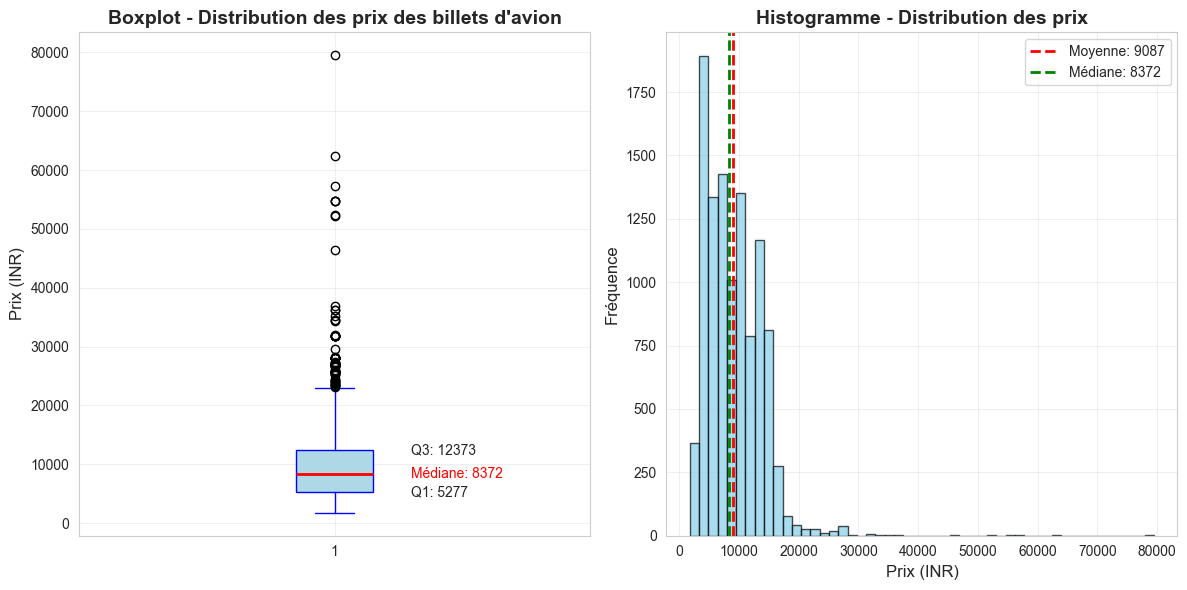

In [113]:
# Visualisation 1 : Boxplot simple pour la variable Price
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['Price'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Prix (INR)', fontsize=12)
plt.title('Boxplot - Distribution des prix des billets d\'avion', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Ajout d'annotations
plt.text(1.15, Q1, f'Q1: {Q1:.0f}', fontsize=10, va='center')
plt.text(1.15, Q3, f'Q3: {Q3:.0f}', fontsize=10, va='center')
plt.text(1.15, df['Price'].median(), f'Médiane: {df["Price"].median():.0f}', fontsize=10, va='center', color='red')

plt.subplot(1, 2, 2)
plt.hist(df['Price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['Price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {df["Price"].mean():.0f}')
plt.axvline(df['Price'].median(), color='green', linestyle='--', linewidth=2, label=f'Médiane: {df["Price"].median():.0f}')
plt.xlabel('Prix (INR)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.title('Histogramme - Distribution des prix', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Visualisation 2 : Boxplots par compagnie aérienne
plt.figure(figsize=(16, 6))

# Trier les compagnies par prix médian pour une meilleure visualisation
airline_order = df.groupby('Airline')['Price'].median().sort_values().index

plt.subplot(1, 1, 1)
sns.boxplot(data=df, x='Airline', y='Price', order=airline_order, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Compagnie aérienne', fontsize=12)
plt.ylabel('Prix (INR)', fontsize=12)
plt.title('Boxplot des prix par compagnie aérienne', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistiques par compagnie
print("\nStatistiques des prix par compagnie aérienne:")
print(df.groupby('Airline')['Price'].describe().round(2))

In [ ]:
# Visualisation 3 : Boxplots par Source et Destination
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot par Source
source_order = df.groupby('Source')['Price'].median().sort_values().index
sns.boxplot(data=df, x='Source', y='Price', order=source_order, palette='Set3', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('Ville de départ', fontsize=12)
axes[0].set_ylabel('Prix (INR)', fontsize=12)
axes[0].set_title('Boxplot des prix par ville de départ', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Boxplot par Destination
dest_order = df.groupby('Destination')['Price'].median().sort_values().index
sns.boxplot(data=df, x='Destination', y='Price', order=dest_order, palette='Set3', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('Ville d\'arrivée', fontsize=12)
axes[1].set_ylabel('Prix (INR)', fontsize=12)
axes[1].set_title('Boxplot des prix par ville d\'arrivée', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Visualisation 4 : Boxplot par nombre d'escales (Total_Stops)
plt.figure(figsize=(12, 6))

# Nettoyer les valeurs nulles pour Total_Stops
df_stops = df.dropna(subset=['Total_Stops'])

sns.boxplot(data=df_stops, x='Total_Stops', y='Price', palette='viridis')
plt.xlabel('Nombre d\'escales', fontsize=12)
plt.ylabel('Prix (INR)', fontsize=12)
plt.title('Boxplot des prix par nombre d\'escales', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("\nStatistiques des prix par nombre d'escales:")
print(df_stops.groupby('Total_Stops')['Price'].describe().round(2))

## 3.4 Résumé de l'analyse exploratoire

In [ ]:
print("="*70)
print("RÉSUMÉ DE L'ANALYSE EXPLORATOIRE ET DIAGNOSTIQUE")
print("="*70)

# 1. Valeurs manquantes
missing_count = df.isnull().sum().sum()
print(f"\n1. VALEURS MANQUANTES:")
print(f"   - Nombre total de valeurs manquantes: {missing_count}")
if missing_count > 0:
    print(f"   - Colonnes concernées: {df.columns[df.isnull().any()].tolist()}")
else:
    print(f"   - Aucune valeur manquante ✓")

# 2. Valeurs dupliquées
duplicate_count = df.duplicated().sum()
print(f"\n2. VALEURS DUPLIQUÉES:")
print(f"   - Nombre de lignes dupliquées: {duplicate_count}")
print(f"   - Pourcentage: {(duplicate_count/len(df)*100):.2f}%")

# 3. Valeurs aberrantes
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers_count = len(df[(df['Price'] < Q1 - 1.5*IQR) | (df['Price'] > Q3 + 1.5*IQR)])
print(f"\n3. VALEURS ABERRANTES (OUTLIERS):")
print(f"   - Nombre d'outliers pour Price: {outliers_count}")
print(f"   - Pourcentage: {(outliers_count/len(df)*100):.2f}%")
print(f"   - Ces valeurs nécessitent une attention particulière lors du preprocessing")

# 4. Statistiques générales
print(f"\n4. STATISTIQUES GÉNÉRALES:")
print(f"   - Nombre total de lignes: {len(df)}")
print(f"   - Nombre de colonnes: {len(df.columns)}")
print(f"   - Prix moyen: {df['Price'].mean():.2f} INR")
print(f"   - Prix médian: {df['Price'].median():.2f} INR")
print(f"   - Écart-type: {df['Price'].std():.2f} INR")

# Supprimer les duplicates pour le preprocessing
print(f"\n5. NETTOYAGE DES DONNÉES:")
df_clean = df.drop_duplicates()
removed_count = len(df) - len(df_clean)
print(f"   - Lignes dupliquées supprimées: {removed_count}")
print(f"   - Nouvelles dimensions: {df_clean.shape}")
print(f"   - Dataset nettoyé prêt pour la modélisation ✓")

# Mettre à jour le dataframe
df = df_clean

In [ ]:
# Préparation des données pour la modélisation

# Encoder les variables catégorielles avec One-Hot Encoding
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True)

# Définition des features (X) et de la cible (y)
# Note: Route n'est pas utilisé car il est redondant avec Source et Destination
# Departure_min, Arrival_hour, Arrival_min sont exclus pour simplifier le modèle

x = df[['Duration', 'Total_Stops', 'Journey_day', 'Journey_month', 'Departure_hour'] + 
       [col for col in df.columns if col.startswith(('Airline_', 'Source_', 'Destination_', 'Additional_Info_'))]]

y = df['Price']

print(f"Nombre de features: {x.shape[1]}")
print(f"Nombre d'observations: {x.shape[0]}")
print(f"\nFeatures numériques utilisées: Duration, Total_Stops, Journey_day, Journey_month, Departure_hour")
print(f"Features catégorielles encodées: Airline, Source, Destination, Additional_Info")

In [ ]:
# Normaliser les variables avec StandardScaler (Z-score normalization)
# Cela centre les données autour de 0 avec un écart-type de 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

print("Normalisation effectuée avec StandardScaler")
print(f"Forme de X_scaled: {X_scaled.shape}")
print(f"\nAprès normalisation:")
print(f"  - Moyenne: ~0 (valeur attendue)")
print(f"  - Écart-type: ~1 (valeur attendue)")

In [ ]:
# Régression Linéaire

# Division des données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape[0]} observations")
print(f"Taille de l'ensemble de test: {X_test.shape[0]} observations")
print()

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

print("Modèle entraîné avec succès!")
print()

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("="*60)
print("RÉSULTATS DU MODÈLE DE RÉGRESSION LINÉAIRE")
print("="*60)
print(f"Erreur Absolue Moyenne (MAE): {mae:.2f} INR")
print(f"Score R² (R-squared): {r2:.4f}")
print()
print(f"Interprétation:")
print(f"  - Le modèle explique {r2*100:.2f}% de la variance des prix")
print(f"  - En moyenne, les prédictions sont à ±{mae:.0f} INR du prix réel")
print("="*60)

In [ ]:
# Analyse des coefficients du modèle
coeffs = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
coeffs_sorted = coeffs.sort_values(by='Coefficient', ascending=False)

print("="*80)
print("TOP 10 FEATURES AYANT LE PLUS D'IMPACT POSITIF SUR LE PRIX")
print("="*80)
print(coeffs_sorted.head(10).to_string(index=False))
print()

print("="*80)
print("TOP 10 FEATURES AYANT LE PLUS D'IMPACT NÉGATIF SUR LE PRIX")
print("="*80)
print(coeffs_sorted.tail(10).to_string(index=False))
print()

print(f"Intercept (ordonnée à l'origine): {model.intercept_:.2f} INR")


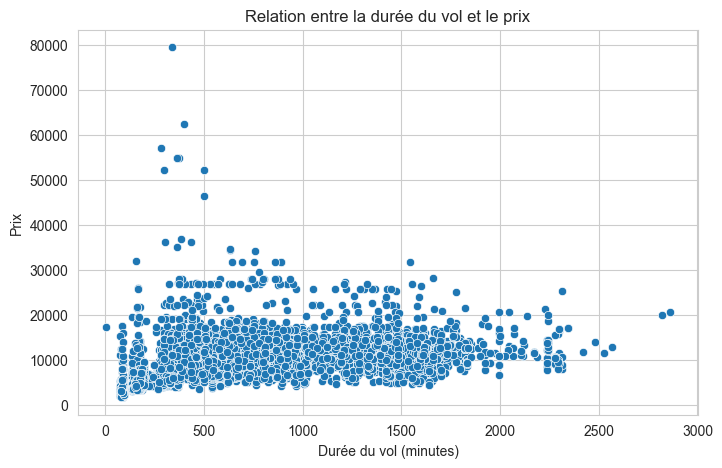

In [122]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Duration'], y=df['Price'])
plt.title("Relation entre la durée du vol et le prix")
plt.xlabel("Durée du vol (minutes)")
plt.ylabel("Prix")
plt.show()

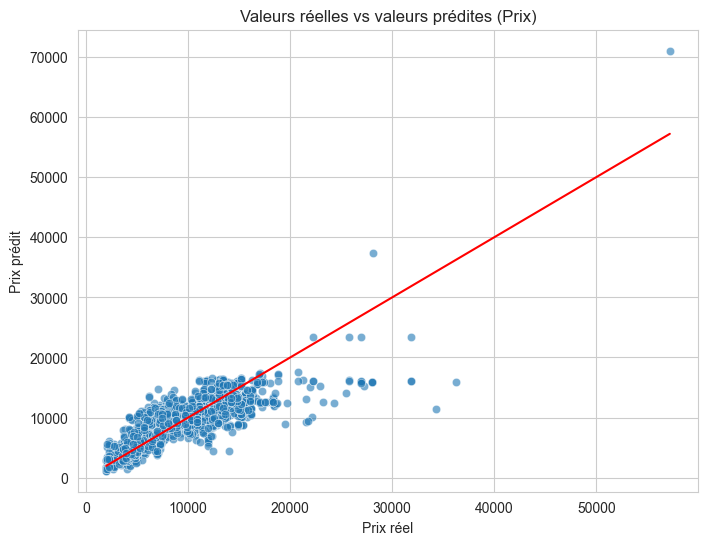

In [123]:
y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.title("Valeurs réelles vs valeurs prédites (Prix)")
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # ligne y=x
plt.show()

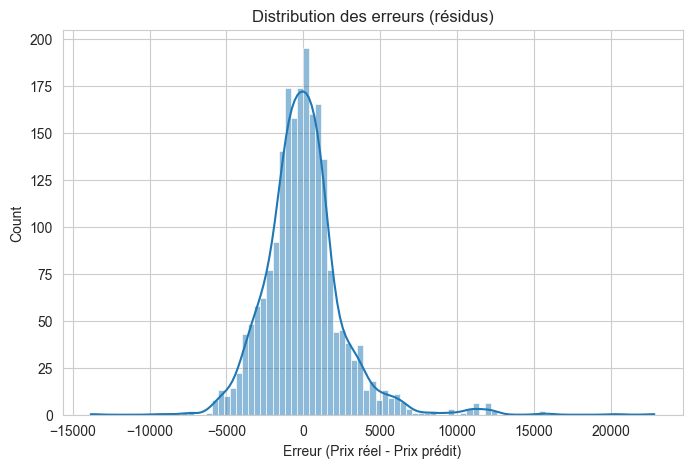

In [124]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Distribution des erreurs (résidus)")
plt.xlabel("Erreur (Prix réel - Prix prédit)")
plt.show()

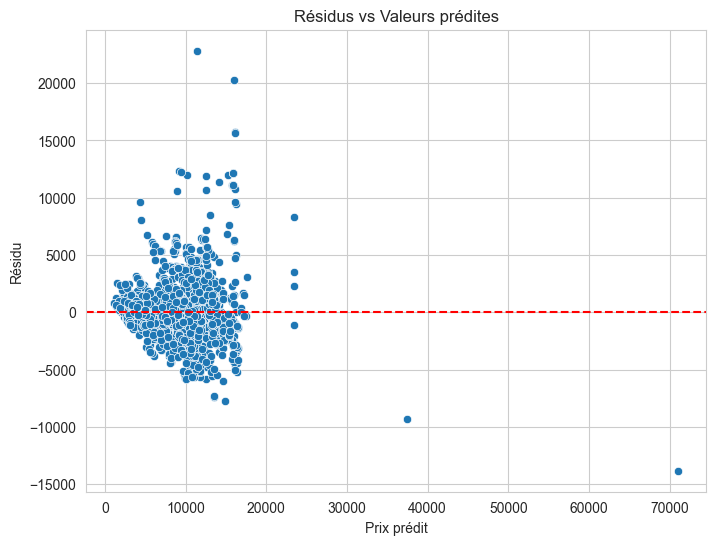

In [125]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Prix prédit")
plt.ylabel("Résidu")
plt.show()

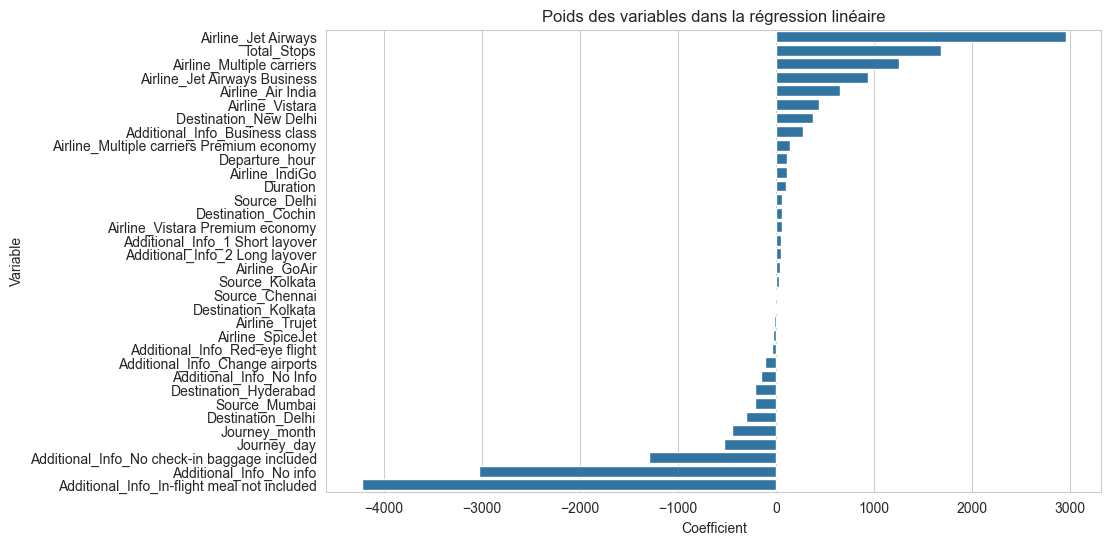

In [126]:
coeffs = pd.DataFrame({
    'Variable': x.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Variable', data=coeffs)
plt.title("Poids des variables dans la régression linéaire")
plt.show()